In [96]:
import numpy as np
import matplotlib.pyplot as plt

# General Least Squares estimates

In [97]:
def model1a(x,a,b,c):
    return a*x + b*np.sqrt(x) + c

In [98]:
a,b,c = 2,4,2
x_values = np.linspace(0,4,20)
noiseless_curve = model1a(x_values,a,b,c)

def add_noise(noiseless_curve, variance):
    
    added_noise = noiseless_curve[:,np.newaxis] + np.random.normal(0
                        ,variance,size=(len(noiseless_curve),10000))    
    return added_noise

# shape (20,10 000)
added_noise = add_noise(noiseless_curve, variance=1)
added_noise_05 = add_noise(noiseless_curve, variance=0.5)
added_noise_01 = add_noise(noiseless_curve, variance=0.1)

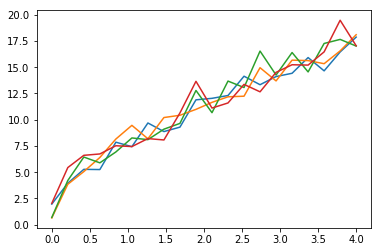

In [99]:
# plot a couple realizations
for i in range(4):
    plt.plot(x_values, added_noise[:,i])
plt.show()

In [100]:
def linleastsquares(X, y):
    """
    Fit linear least squares, given a matrix X
    X = shape (num_params,observations) (3,20)
    y = observed data values -- shape = (20,)
    
    returns beta -- best fit parameters -- shape (3,)
    """
    beta = np.dot((np.dot( np.linalg.inv(np.dot(X.T,X)), X.T)),y)   
    return beta

1.704049215829559 4.342563997452265 1.7303055382903665


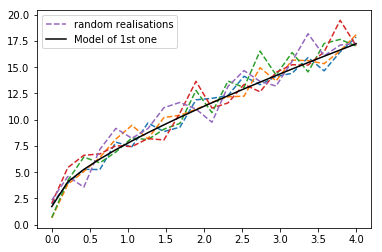

In [101]:
# fit a least squares fit to one example
one_example = added_noise[:,0]

y = one_example
X = np.array([ x_values, np.sqrt(x_values), np.ones(len(x_values)) ]).T

ahat, bhat, chat = linleastsquares(X,y)
print (ahat,bhat,chat)

model = lambda x: ahat*x+bhat*np.sqrt(x)+chat
for i in range(4):
    plt.plot(x_values, added_noise[:,i],ls='dashed')
plt.plot(x_values, added_noise[:,i+1],ls='dashed',label='random realisations')
    
plt.plot(x_values,model(x_values),c='k',label='Model of 1st one')
plt.legend()
plt.show()

In [102]:
# Now fit least squares to all of em
def fit_all_leastsquares(added_noise): 
    """
    added_noise is a version with variance 1 0.5 or 0.1
    """
    all_ahat = []
    all_bhat = []
    all_chat = []

    X = np.array([ x_values, np.sqrt(x_values), np.ones(len(x_values)) ]).T
    for i in range(0,added_noise.shape[1]):
        example = added_noise[:,i]
        ahat, bhat, chat = linleastsquares(X,example)
        all_ahat.append(ahat)
        all_bhat.append(bhat)
        all_chat.append(chat)
        
    return all_ahat, all_bhat, all_chat

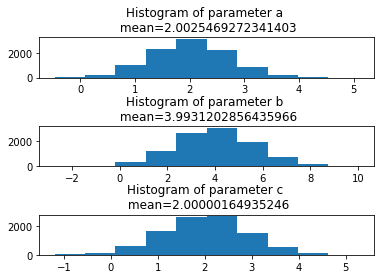

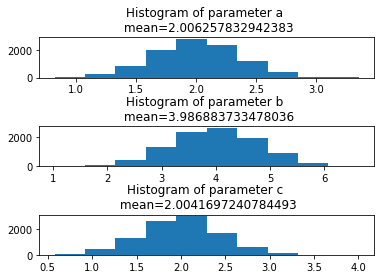

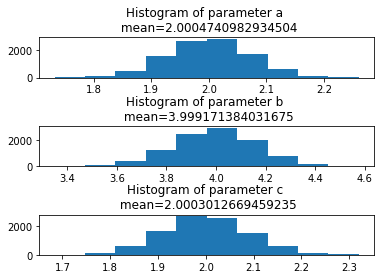

Variance of estimator with noise amplitude 1,0.5,0.1 respectively
a: (0.4922143403932367, 0.12352813942995415, 0.00491610728121036)
b: (2.615812532474874, 0.6558441451208938, 0.026290649061658615)
c: (0.7808409230271521, 0.19409634791849018, 0.007896036862808913)


In [103]:
all_ahat1, all_bhat1, all_chat1 = fit_all_leastsquares(added_noise)

all_ahat05, all_bhat05, all_chat05 = fit_all_leastsquares(added_noise_05)

all_ahat01, all_bhat01, all_chat01 = fit_all_leastsquares(added_noise_01)


def plot_hists(all_ahat,all_bhat,all_chat=None):
    num_plots = 3
    if all_chat is None:
        num_plots -= 1
    
    fig, axes = plt.subplots(num_plots,1)
    plt.subplots_adjust(hspace=1.2)
    ax = axes[0]
    ax.hist(all_ahat)
    ax.set_title(f'Histogram of parameter a \n mean={np.mean(all_ahat)}')

    ax = axes[1]
    ax.hist(all_bhat)
    ax.set_title(f'Histogram of parameter b \n mean={np.mean(all_bhat)}')

    if all_chat is not None:
        ax = axes[2]
        ax.hist(all_chat)
        ax.set_title(f'Histogram of parameter c \n mean={np.mean(all_chat)}')

    plt.show()
    
plot_hists(all_ahat1, all_bhat1, all_chat1)
plot_hists(all_ahat05, all_bhat05, all_chat05)
plot_hists(all_ahat01, all_bhat01, all_chat01)

print ("Variance of estimator with noise amplitude 1,0.5,0.1 respectively")
print (f"a: {np.var(all_ahat1), np.var(all_ahat05), np.var(all_ahat01)}")
print (f"b: {np.var(all_bhat1), np.var(all_bhat05), np.var(all_bhat01)}")
print (f"c: {np.var(all_chat1), np.var(all_chat05), np.var(all_chat01)}")

### Now consider a model that varies more

In [104]:
def model1b(x,a,b):
    return a*np.sqrt(x) + b*np.sin(2*np.pi*x/10)

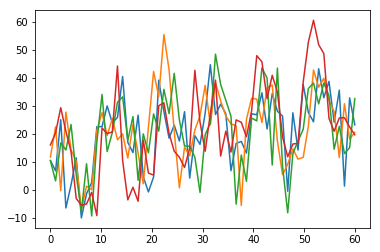

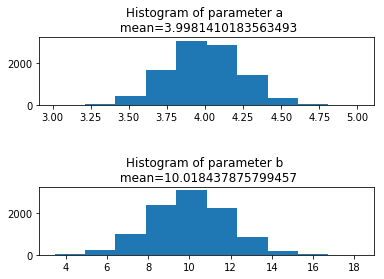

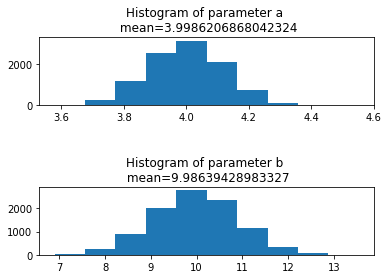

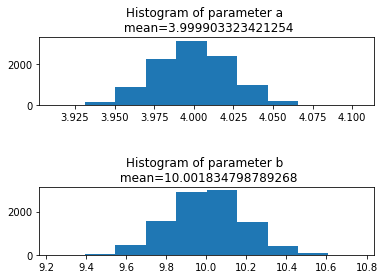

Variance of estimator with noise amplitude 1,0.5,0.1 respectively
a: (0.055708181314840455, 0.01416444958826808, 0.0005552908905774308)
b: (3.435897639622889, 0.8488354041551062, 0.03414109342841042)


In [106]:
a,b = 4, 10
x_values = np.linspace(0,60,60)
noiseless_curve = model1b(x_values,a,b)

# shape (60,10 000)
added_noise10 = add_noise(noiseless_curve, variance=10)
added_noise5 = add_noise(noiseless_curve, variance=5)
added_noise1 = add_noise(noiseless_curve, variance=1)

# plot a couple realizations
for i in range(4):
    plt.plot(x_values, added_noise10[:,i])
plt.show()

# Now fit least squares to all of em
def fit_all_leastsquares1b(added_noise): 
    """
    added_noise is a version with variance 1 0.5 or 0.1
    """
    all_ahat = []
    all_bhat = []

    X = np.array([ np.sqrt(x_values), np.sin(2*np.pi*x_values/10)]).T
    for i in range(0,added_noise.shape[1]):
        example = added_noise[:,i]
        ahat, bhat = linleastsquares(X,example)
        all_ahat.append(ahat)
        all_bhat.append(bhat)
        
    return all_ahat, all_bhat

all_ahat10, all_bhat10 = fit_all_leastsquares1b(added_noise10)
all_ahat5, all_bhat5 = fit_all_leastsquares1b(added_noise5)
all_ahat1, all_bhat1 = fit_all_leastsquares1b(added_noise1)

plot_hists(all_ahat10, all_bhat10)
plot_hists(all_ahat5, all_bhat5)
plot_hists(all_ahat1, all_bhat1)

print ("Variance of estimator with noise amplitude 1,0.5,0.1 respectively")
print (f"a: {np.var(all_ahat10), np.var(all_ahat5), np.var(all_ahat1)}")
print (f"b: {np.var(all_bhat10), np.var(all_bhat5), np.var(all_bhat1)}")


# Galaxy stellar mass function

In [111]:
# File that contains stellar mass in log10 units for 5 galaxy clusters 
# at z=0.101
# Every row is single galaxy 
file = './smfdata.txt'
galaxymasses = np.loadtxt(file)

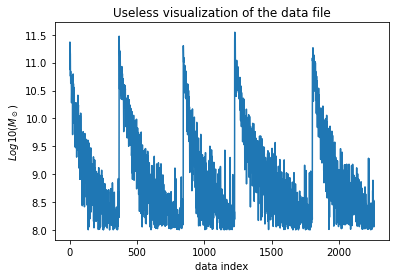

In [113]:
plt.plot(galaxymasses)
plt.title("Useless visualization of the data file")
plt.ylabel('$Log10 (M_\odot)$')
plt.xlabel('data index')
plt.show();

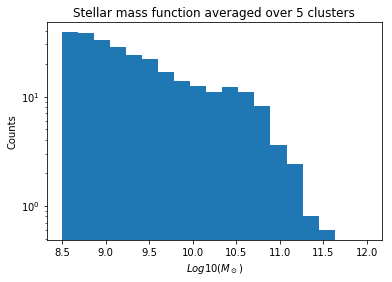

In [128]:
# Just stack all 5 clusters and then divide by the number of clusters
bins = np.linspace(8.5,12,20)
counts, bins, _ = plt.hist(galaxymasses,bins=bins
                           , weights=np.ones(len(galaxymasses))*1/5)
plt.xlabel('$Log10 (M_\odot)$')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Stellar mass function averaged over 5 clusters')
plt.show()

In [124]:
def schechter(M, Mstar, alpha, phi):
    """
    return the schechter function for mass M
    given Mstar = characterisctic mass
    alpha = low-mass slope
    phi = normalization const
    """
    tmp = np.power(10, (M-Mstar)*(1+alpha) )
    
    return np.log(10)*phi*tmp * np.exp(-1*tmp)
    

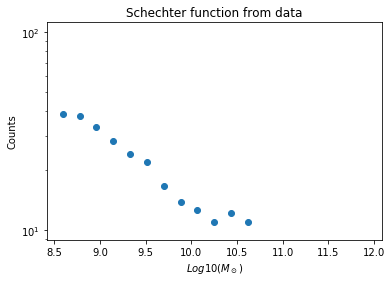

In [132]:
# The schechter function takes the mass of the center of the bin M
# and spits out the number of galaxies per cluster for this bin
# So we plot it this way now

diff = bins[1] - bins[0]
bin_centers = bins[:-1] + diff/2
plt.scatter(bin_centers,counts)
plt.xlabel('$Log10 (M_\odot)$')
plt.ylabel('Counts')
plt.title("Schechter function from data")
plt.yscale('log')
plt.show()